# Step 1 - 데이터 준비

UCI 머신러닝 저장소에서 제공하는 암세포 진단(breast-cancer) 데이터셋을 준비한다. 샘플 ID, 암세포 조직의 크기와 모양 등 종양 특성을 나타내는 열 9개와 악성 종양 여부(`2`: 양성, `4`:악성)를 나타내는 열로 구성되어 있다.

데이터셋의 크기는 11개의 열에 699개의 행으로 되어있다.

In [19]:
# 기본 라이브러리 불러오기
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# Breast Cancer 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)

# 열 이름 지정
df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
              'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class']

# 데이터셋의 크기
print(df.shape)

(699, 11)


# Step 2 - 데이터탐색

데이터프레임 `df`에서 무작위로 5개의 행을 선택하여 출력해본다. 대부분의 열이 숫자형으로 추정된다.

In [20]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
df.sample(5)

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
287,535331,3,1,1,1,3,1,2,1,1,2
639,1277792,5,1,1,3,2,1,1,1,1,2
335,792744,1,1,1,1,2,1,1,1,1,2
548,1240603,3,1,1,1,1,1,1,1,1,2
242,1277018,2,1,1,1,2,1,3,1,1,2


`info()` 메서드로 데이터의 자료형들을 확인해보면, `bare_nuclei` 열을 제외하고 모두 숫자형이다.

In [21]:
# 데이터 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clump            699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epithlial        699 non-null    int64 
 6   bare_nuclei      699 non-null    object
 7   chromatin        699 non-null    int64 
 8   normal_nucleoli  699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


`describe()` 메서드에 `include='all'` 매개변수를 사용하여 숫자형뿐만 아니라 `object` 열에 대한 통계 요약 정보를 얻는다.

In [22]:
# 데이터 통계 요약정보 확인
df.describe(include='all')

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


데이터프레임의 결측치를 확인해 보면 모든 열에 누락 데이터가 없는 것으로 확인된다.

In [23]:
# 누락 데이터 확인
df.isnull().sum()

id                 0
clump              0
cell_size          0
cell_shape         0
adhesion           0
epithlial          0
bare_nuclei        0
chromatin          0
normal_nucleoli    0
mitoses            0
class              0
dtype: int64

중복행 여부를 확인해보면 8개의 행이 다른 행과 같은 것으로 확인된다.

In [24]:
# 중복 데이터 확인
df.duplicated().sum()

8

`value_counts(normalize=True)` 메서드는 목표 변수인 `class` 열에 들어 있는 개별 고유값의 상대적인 빈도를 계산하여 반환한다. 양성(benign)을 뜻하는 클래스 `2`가 약 66%를 차지하고, 악성(malignant)을 뜻하는 클래스 `4`가 약 34% 비율로 구성되어 있다.

In [25]:
# 목표변수 
df['class'].value_counts(normalize=True)

class
2    0.655222
4    0.344778
Name: proportion, dtype: float64

`class` 열에 있는 값을 이진 변수로 변환한다. `2`를 양성을 나타내는 `0`으로(`Negative`), `4`를 악성을 나타내는 `1`(`positive`)로 매핑해준다. 머신러닝 모델에서 이진 분류 문제를 다룰 때 일반적으로 사용되는 방법이다.

In [26]:
# 목표변수를 이진 변수로 변환 - 2: benign(양성), 4: malignant(악성)
df['class'] = df['class'].map({2: 0, 4: 1})
df['class'].value_counts(normalize=True)

class
0    0.655222
1    0.344778
Name: proportion, dtype: float64

`hist()` 메서드를 사용하여, 데이터프레임에 포함된 모든 숫자형 열에 대한 히스토그램을 그린다. 데이터의 분포를 빠르게 시각화하고 이해하는 데 유용하다.

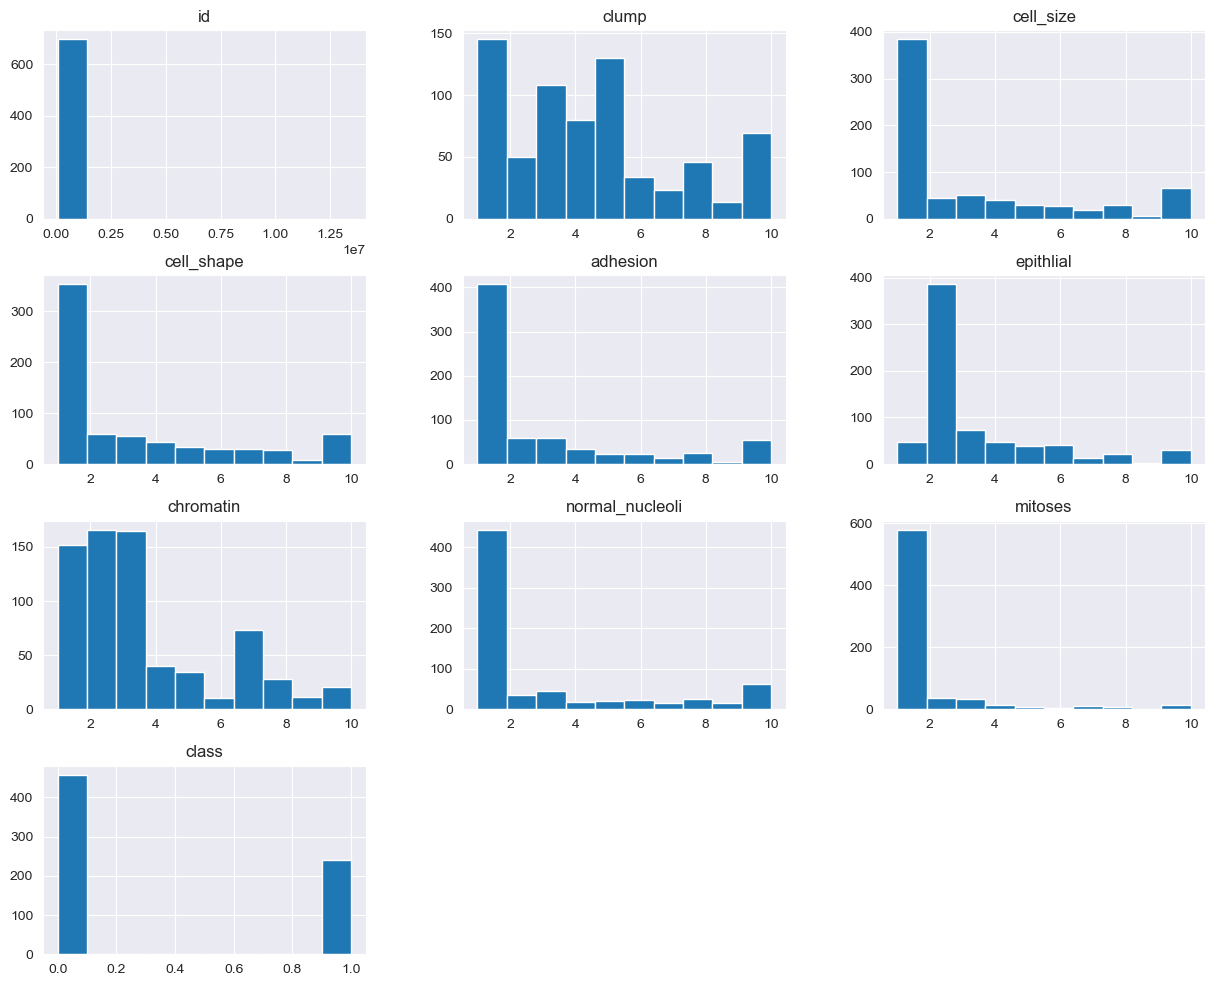

In [29]:
# pandas hist 시각화
df.hist(figsize=(15, 12));

`seaborn`의 `pairplot` 함수를 사용하여 데이터셋의 여러 변수 간의 관계를 시각화한다. 각 열의 가능한 모든 조합에 대해 산점도를 그리고 각 변수에 대한 히스토그램을 그린다. (계산 속도를 감안하여 5개의 열만 선택해서 시각화)

`hue='class'` 옵션을 적용하여 `class` 열의 범주를 기준으로 색상을 다르게 표시한다. 각 클래스별로 구분하여 데이터를 시각화하기 때문에, 클래스별 분포의 차이를 확인하는데 유용하다.

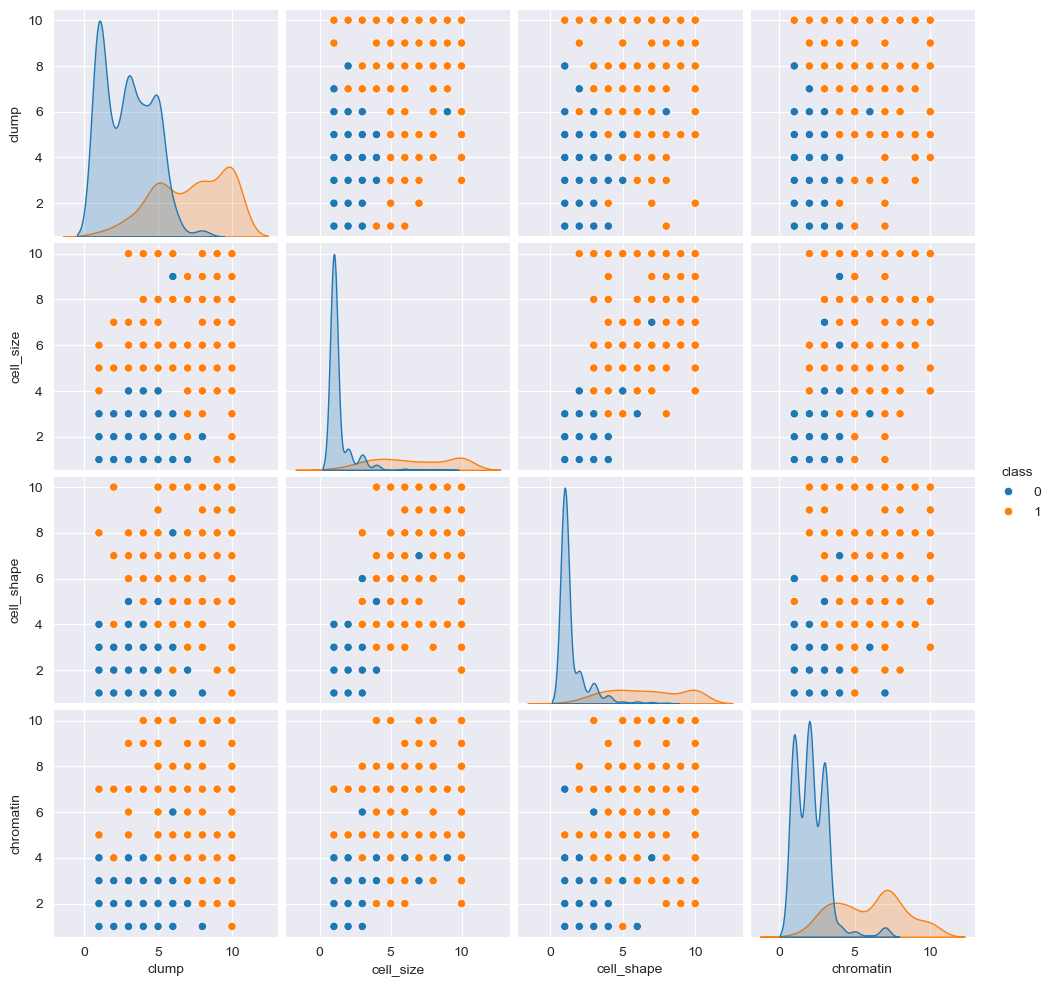

In [30]:
# seaborn pairplot 시각화
vis_cols = ['clump', 'cell_size', 'cell_shape', 'chromatin', 'class']
sns.pairplot(data=df[vis_cols], hue='class');

데이터 탐색 단계에서 확인한 중복데이터를 제거하면, 8개의 데이터가 제거되고, 691개의 행이 남는다.

In [31]:
'''
[Step 3] 데이터 전처리
'''

# 중복 데이터 제거
print('중복 제거 이전: ', df.shape)
df = df.drop_duplicates()
print('중복 제거 이후: ', df.shape)

중복 제거 이전:  (699, 11)
중복 제거 이후:  (691, 11)


`bare_nuclei` 열을 숫자형으로 변환하면 모델이 인식하는 데 문제가 없다. 우선 `bare_nuclei` 열의 데이터가 갖는 고유값을 `unique()` 메서드를 사용하여 확인하면 `?` 값이 섞여 있음을 알 수 있다. `?` 값을 `np.nan`으로 바꿔준다.

`dropna()` 메서드를 NaN 값이 들어 있는 행을 전부 삭제하면 `bare_nuclei` 열에는 숫자로 구성된 문자열만 남게된다. `astype()` 메서드를 사용해서 정수형으로 변환해준다.

691개 행 중 16개 행이 삭제되고, 675개의 관측값이 남게 된다.

In [32]:
### bare_nuclei 열의 자료형 변경 (문자열 ->숫자)
# bare_nuclei 열의 고유값 확인
print('bare_nuclei 열의 고유값: ', df['bare_nuclei'].unique())

bare_nuclei 열의 고유값:  ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


In [33]:
df['bare_nuclei'] = df['bare_nuclei'].replace('?', np.nan)  # '?'을 np.nan으로 변경
df = df.dropna(subset=['bare_nuclei'], axis=0)  # 누락데이터 행을 삭제
df['bare_nuclei'] = df['bare_nuclei'].astype('int')  # 문자열을 숫자형으로 변환

# 데이터 통계 요약정보 확인
df.describe()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
count,6.750000e+02,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,1.078448e+06,4.451852,3.146667,3.208889,2.848889,3.229630,3.537778,3.442963,2.885926,1.607407,0.349630
std,6.229108e+05,2.820859,3.055005,2.976552,2.875917,2.208497,3.637871,2.453894,3.065607,1.741006,0.477207
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.781505e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171845e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238777e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


# Step 4 - 훈련/검증 데이터 분할

데이터프레임에서 설명 변수 `X`로 사용할 열들을 먼저 선택하고 예측 변수로 사용할 `class` 열을 선택한다. 설명 변수를 정규화하고 훈련 데이터와 검증 데이터로 분리한다.(7:3)

In [35]:
'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
train_features = ['clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
                  'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses']
X = df[train_features]  # 설명 변수 X
y = df['class']  # 예측 변수 Y

# 설명 변수 데이터를 정규화
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (472, 9)
test data 개수:  (203, 9)


### Step 5 - Decision Tree 분류 모형

`sklearn`의 `tree` 모듈의 `DecisionTreeClassifier()` 함수를 사용하여 모델 객체(`tree_model`)를 생성한다.

다음의 코드에서는 각 분기점에서 최적의 특성을 찾기 위해 분류 정도를 평가하는 기준으로 `entropy` 값을 사용한다. 트리 레벨을 5(`max_depth=5`)로 지정하는데, 5단계까지 가지를 확장할 수 있다는 뜻이다.

훈련 데이터(`X_train`, `y_train`)를 fit() 메서드에 입력하여 모델을 학습시킨다. 학습을 마치면 검증 데이터(`X_train`)를 `predict()` 메서드에 전달하여 모델이 예측한 결과를 변수 `y_hat`에 저장한다.

모형의 예측값(`y_hat`)과 실제값(`y_test`)을 비교하면 첫 10개 데이터 모두 예측값이 실제 값과 일치한다.

In [36]:
'''
[Step 5] Decision Tree 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 Decision Tree 분류 모형 가져오기

# 모형 객체 생성 (criterion='entropy' 적용)
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

# train data를 가지고 모형 학습
tree_model.fit(X_train, y_train)

# test data를 가지고 y_hat을 예측 (분류)
y_hat = tree_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 1 1 0 0 1 1 0 0 1]
[0 1 1 0 0 1 1 0 0 1]


다음으로 모델 평가 지표를 계산한다. 양성 종양의 목표 레이블은 0이고 악성 종양은 1이다. 검증 데이터에 대한 모델의 예측값을 혼동 행렬로 나타내면 양성을 정확히 분류한 `TN`은 123개, 양성을 악성으로 잘못 분류한 `FP`은 7개, 악성을 양성으로 잘못 분류한 `FN`는 2개, 악성을 정확히 분류한 `TP`는 71개이다.

In [38]:
# 모형 성능 평가 - Confusion Matrix 계산
tree_matrix = metrics.confusion_matrix(y_test, y_hat)
print(tree_matrix)

[[123   7]
 [  2  71]]


`heatmap()` 함수를 사용해서 혼동 행렬의 히트맵을 시각화한다.

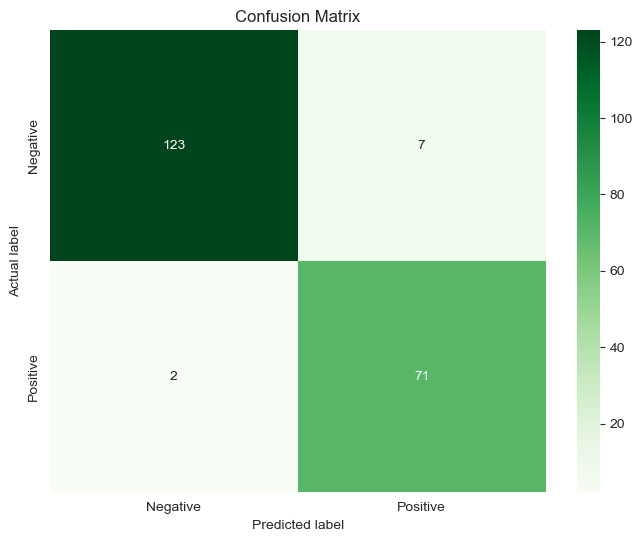

In [39]:
# Confusion Matrix 시각화

plt.figure(figsize=(8, 6))
sns.heatmap(tree_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [40]:
# 모형 성능 평가 - 평가지표 계산
tree_report = metrics.classification_report(y_test, y_hat)
print(tree_report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       130
           1       0.91      0.97      0.94        73

    accuracy                           0.96       203
   macro avg       0.95      0.96      0.95       203
weighted avg       0.96      0.96      0.96       203



In [42]:
# 특성 중요도 출력
features = pd.DataFrame(tree_model.feature_importances_,
                        index=train_features,
                        columns=['Importance'])
features = features.sort_values(by='Importance', ascending=False)
features

,Importance
cell_size,0.707854
bare_nuclei,0.135085
clump,0.086802
chromatin,0.026032
epithlial,0.017665
adhesion,0.014764
normal_nucleoli,0.011798
cell_shape,0.000000
mitoses,0.000000


`barplot()` 함수를 사용하여 의사결정나무 모델의 특성 중요도를 막대 그래프로 시각화해보자. 각 막대는 암세포 데이터셋의 특성(feature)을 나타내며, 막대의 길이는 해당 특성의 중요도(importance)를 나타낸다.

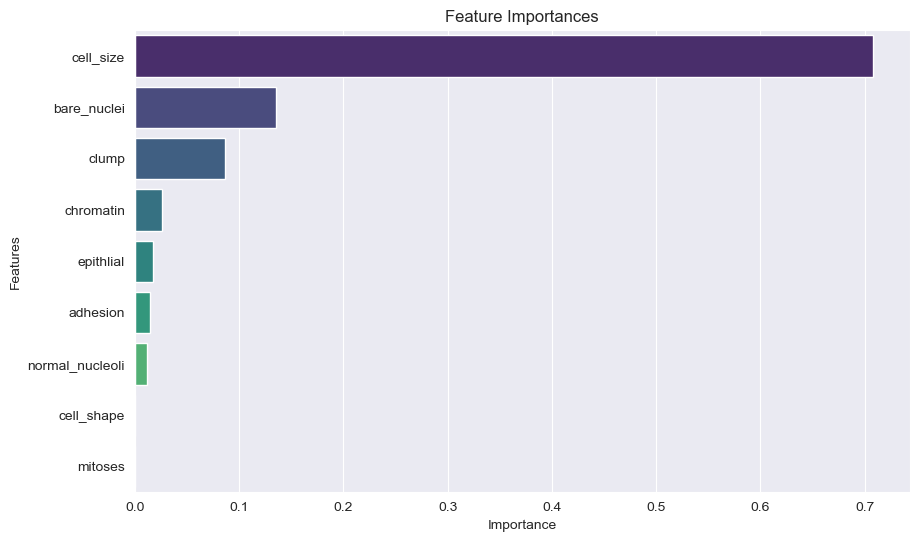

In [43]:
# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=features.Importance, y=features.index,
            hue=features.index, legend=False,
            palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()